# Satellite Environmental Performance Simulator (SEPS)
This project analyzes how solar radiation, eclipse effects, and atmospheric drag influence satellite performance in Low Earth Orbit (LEO).

**Libraries:** Pandas, NumPy, Matplotlib  
**Author:** Balogun Oluwatobiloba
**Objective:** Simulate and visualize how environmental factors impact satellite power and orbit.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')  # cleaner visuals


### Step 1: Solar Radiation Analysis
We’ll visualize solar flux variation over time using sample or NASA OMNI data.


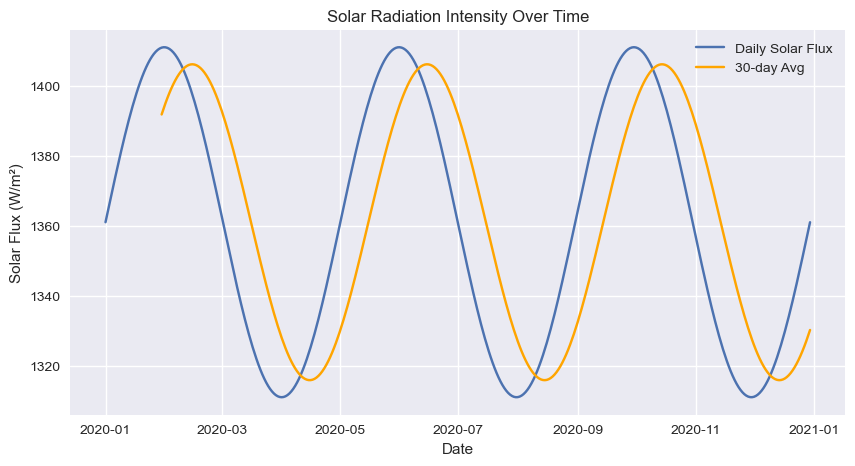

In [2]:
# Simulate solar flux data or import from NASA OMNI dataset
dates = pd.date_range(start="2020-01-01", periods=365)
solar_flux = 1361 + 50 * np.sin(np.linspace(0, 6*np.pi, 365))  # synthetic variation

df = pd.DataFrame({'Date': dates, 'Solar_Flux': solar_flux})
df['Smoothed'] = df['Solar_Flux'].rolling(window=30).mean()

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Solar_Flux'], label='Daily Solar Flux')
plt.plot(df['Date'], df['Smoothed'], label='30-day Avg', color='orange')
plt.title('Solar Radiation Intensity Over Time')
plt.xlabel('Date')
plt.ylabel('Solar Flux (W/m²)')
plt.legend()
plt.show()


### Step 2: Satellite Power Output Simulation
Using the equation: P = η × A × I × cos(θ)
We simulate one full orbit (0–2π radians) to visualize power generation across eclipse periods.


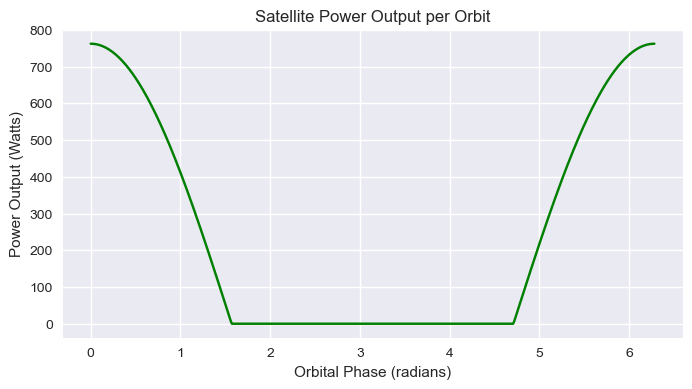

In [3]:
eta = 0.28   # solar panel efficiency
A = 2.0      # m²
I = 1361     # solar constant
theta = np.linspace(0, 2*np.pi, 500)

P = eta * A * I * np.cos(theta)
P[P < 0] = 0  # eclipse period -> no power

plt.figure(figsize=(8,4))
plt.plot(theta, P, color='green')
plt.title('Satellite Power Output per Orbit')
plt.xlabel('Orbital Phase (radians)')
plt.ylabel('Power Output (Watts)')
plt.grid(True)
plt.show()


### Step 3: Orbit Decay Simulation due to Atmospheric Drag
We model orbital altitude decay in LEO caused by drag force over 1 year.


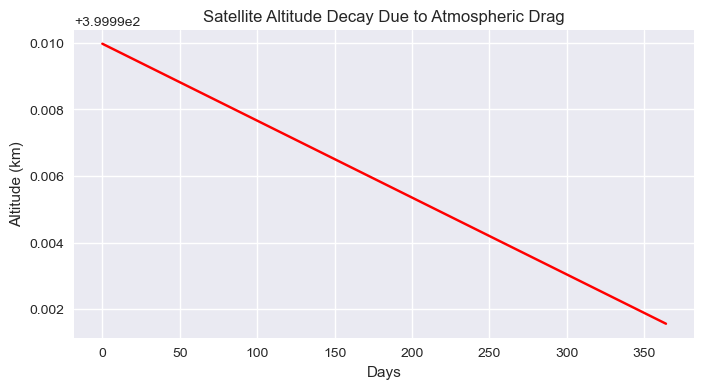

In [4]:
Cd = 2.2     # drag coefficient
A = 2.0      # m²
m = 500      # kg
v = 7800     # m/s (typical LEO)
rho = 1e-11  # atmospheric density at ~400km

days = np.arange(0, 365)
altitude = []
h = 400e3  # initial altitude (m)

for day in days:
    Fd = 0.5 * rho * v**2 * Cd * A
    decay = (Fd/m) * (86400) / 10   # simplified daily decay
    h -= decay
    altitude.append(h / 1000)

plt.figure(figsize=(8,4))
plt.plot(days, altitude, color='red')
plt.title('Satellite Altitude Decay Due to Atmospheric Drag')
plt.xlabel('Days')
plt.ylabel('Altitude (km)')
plt.grid(True)
plt.show()


### Step 4: Combined Environmental Insights
We’ll summarize how solar radiation, eclipse effects, and drag collectively influence performance.


In [5]:
summary = pd.DataFrame({
    'Day': days,
    'Altitude_km': altitude,
    'Avg_Solar_Flux': df['Smoothed'][:len(days)].values
})

summary.head()


,Day,Altitude_km,Avg_Solar_Flux
0,0,399.999977,NaN
1,1,399.999954,NaN
2,2,399.999931,NaN
3,3,399.999907,NaN
4,4,399.999884,NaN


### Step 5: Conclusion
- Solar radiation varies significantly, affecting power generation.
- Eclipse periods create intermittent power loss.
- Atmospheric drag gradually lowers orbit, influencing mission lifespan.

Future upgrades:
- Integrate NASA API for live space weather data.
- Add battery model for energy balance.
- Visualize 3D orbit using Plotly or VPython.
